In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq

# Ruta del archivo .wav
archivo_wav = 'violin_c.wav'

# Leer el archivo .wav
frecuencia_muestreo, data = wavfile.read(archivo_wav)

# Mostrar información sobre el archivo
print(f'Frecuencia de muestreo: {frecuencia_muestreo} Hz')
print(f'Forma del arreglo de datos: {data.shape}')

t_final = len(data)/frecuencia_muestreo

tiempo = np.linspace(0,t_final,len(data))

Frecuencia de muestreo: 44100 Hz
Forma del arreglo de datos: (119543, 2)


C:\Users\rr961\AppData\Local\Temp\ipykernel_21940\626198113.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frecuencia_muestreo, data = wavfile.read(archivo_wav)
C:\Users\rr961\AppData\Local\Temp\ipykernel_21940\626198113.py:10: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  frecuencia_muestreo, data = wavfile.read(archivo_wav)


In [2]:
data.shape

(119543, 2)

Canal izquierdo: (119543,)
Canal derecho: (119543,)


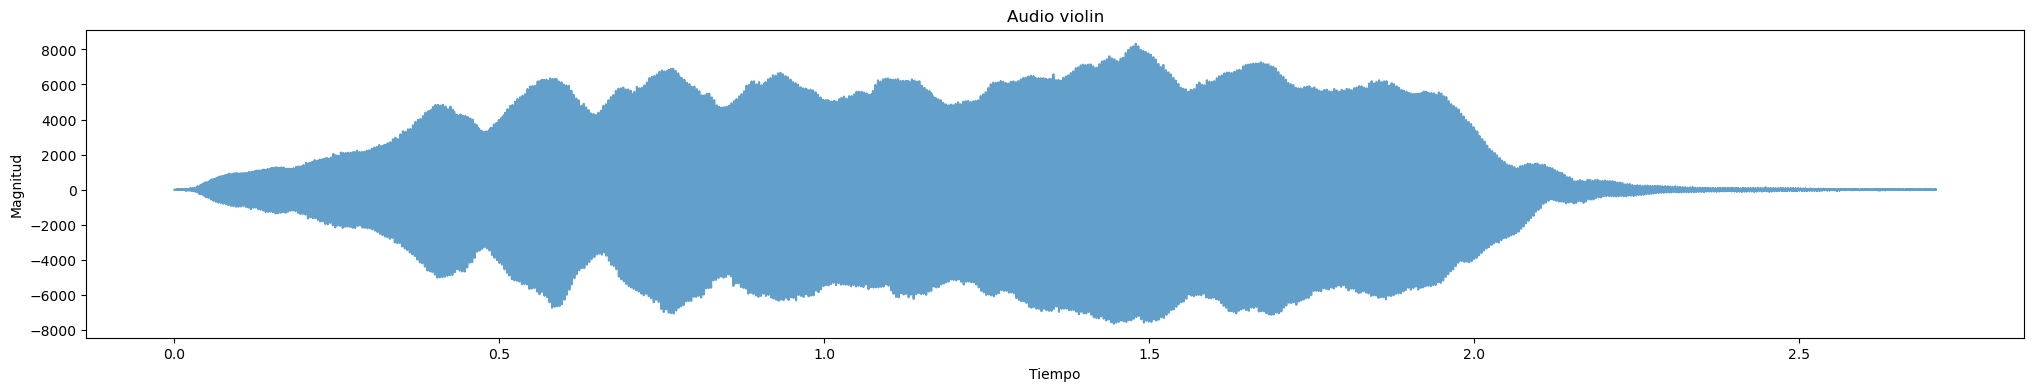

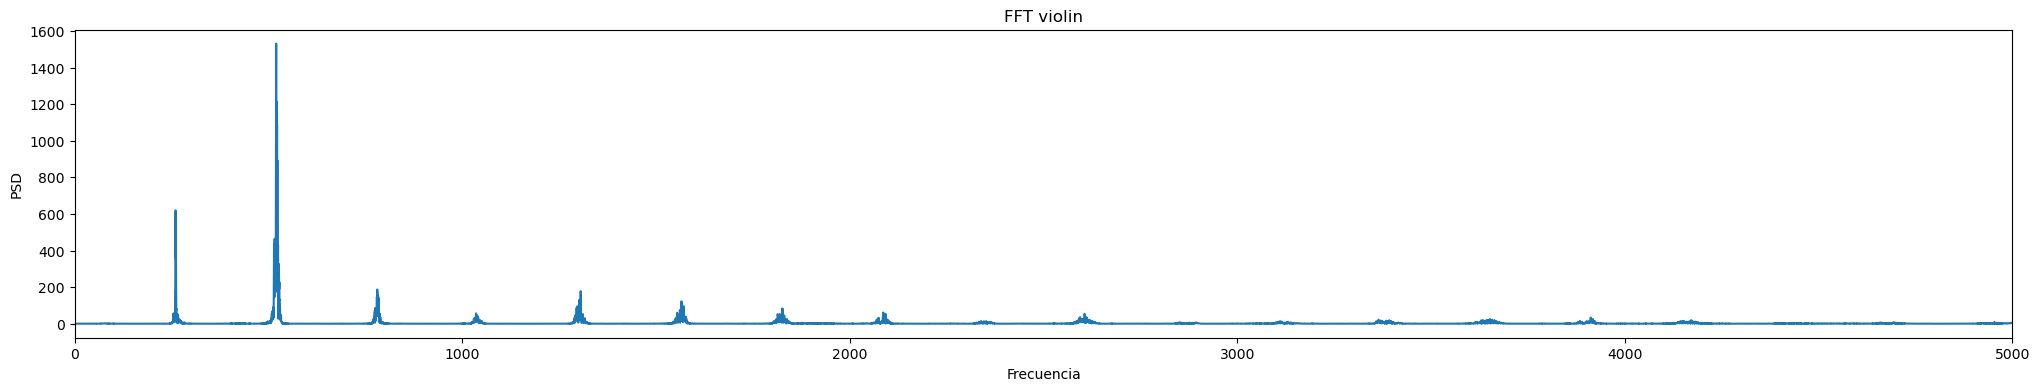

In [4]:
canal_izquierdo = data[:, 0]
canal_derecho = data[:, 1]

    # Mostrar información sobre los canales separados
print(f'Canal izquierdo: {canal_izquierdo.shape}')
print(f'Canal derecho: {canal_derecho.shape}')

# Fast Fourier Transform (FFT)

N = len(canal_izquierdo)
xf = rfftfreq(N, 1/frecuencia_muestreo)
yf = rfft(canal_izquierdo)
psd = 2*np.abs(yf)/N


plt.figure(figsize=(25,4))
plt.plot(tiempo, canal_izquierdo, alpha=0.7)
plt.title('Audio violin')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.show()

plt.figure(figsize=(25,4))
plt.plot(xf, psd)
plt.title('FFT violin')
plt.xlabel('Frecuencia')
plt.xlim(0,5000)
plt.ylabel('PSD')
plt.show()
